<div>
    <img style="float:right; width:210px" src="openaq.png"/>
    <div style="float:left;"><h1>Pollution Insights: Delhi vs Frankfurt</h1></div>
</div>

# Preface

Air pollution is a critical global issue that affects urban environments, with diverse causes and severe impacts. This analysis focuses on two industrially significant regions: Delhi, a highly polluted city in a developing country, where pollution arises from industrial emissions and various human activities, and Frankfurt, a financial hub in a developed nation, which faces its own pollution challenges driven by industrial operations and traffic.

# Research Quesiton

**How do the levels of PM2.5 and O3 in Beijing and Frankfurt compare during weekdays and weekends of the last three years?**

The research question focuses on two major regions, Beijing and Frankfurt. Two majorly industrialised cities with diverse air qualities are considered. This analyses which is carried out comparing the effects of industrial activities and other human activities over the weekends and weekdays would shed a light by revealing the patterns on the socio economic activities, commuting and industry schedules. As two industrial cities in different countries are taken for consideration, this analyses could also reveal the efficiency of the environmental protection policy of both the countries.

The OpenAQ API provides access to a wide range of air quality metrics that are crucial for assessing environmental and public health. Particulate Matter (PM2.5 and PM10), Nitrogen Dioxide (NO2), Sulfur Dioxide (SO2), Carbon Monoxide (CO), Ozone (O3) are the metrics by which air quality is measured. Among these **PM2.5** and **O3** are taken into consideration in this analyses.  

## Data Set and Air Quality Measurement


The OpenAQ API provides access to a wide range of air quality metrics that are crucial for assessing environmental and public health.

- **Particulate Matter (PM2.5 and PM10)**
  - PM2.5 and PM10 are tiny particles in the air.
  - They can penetrate deep into the lungs and enter the bloodstream.
  - Pose significant health risks, including respiratory and cardiovascular issues.
  
- **Ozone (O3)**
  - Ground-level ozone is a component of smog.
  - Beneficial in the upper atmosphere but harmful at ground level.
  - Can cause breathing problems, trigger asthma, and reduce lung function.

# Data Retrieval

The primary aim is to collect the specified parameter readings from both cities. After gathering the data, we will categorize the readings into weekends and weekdays. Few initial steps were taken before generating the below code:-
- Parameter ID and location ID was found using OpenAQ API reference [(Source)](https://docs.openaq.org/reference/parameters_get_v2_parameters_get)
- Specific city data retrieved using location ID.
- For easier access of retrieval and visualisation, averaged values of the required parameter with daily frequence are considered.
- The date range is considered from 2021-05-01 till 2024-05-01.

Firstly, the readings of the parameter PM2.5 for Beijing is fetched. (PM25 ID = 2, Location ID = 8833)

In [4]:
import requests # package to send http queries to the API
import pandas 

#url fetched from Openaq documentation

link1 = "https://api.openaq.org/v2/averages?temporal=day&parameters_id=2&date_to=2024-05-01&date_from=2021-05-01&locations_id=8833&limit=1000&page=1"
res1 = requests.get(link1)
raw_data_beijing = res1.json()
df_pm25_beijing = pandas.json_normalize(raw_data_beijing["results"]) #flattening the Json data 
df_pm25_beijing #Dataframe contains PM2.5 readings of Beijing for the past three years

,id,name,hour,day,month,year,hod,dow,average,measurement_count,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,8833,Beijing,None,2021-04-30,None,None,None,None,30.000000,1,pm25,2,PM2.5,µg/m³,2021-04-30T23:00:00Z,2021-04-30T23:00:00Z
1,8833,Beijing,None,2021-05-01,None,None,None,None,13.916667,12,pm25,2,PM2.5,µg/m³,2021-05-01T00:00:00Z,2021-05-01T13:00:00Z
2,8833,Beijing,None,2021-05-03,None,None,None,None,41.533333,15,pm25,2,PM2.5,µg/m³,2021-05-03T03:00:00Z,2021-05-03T20:00:00Z
3,8833,Beijing,None,2021-05-04,None,None,None,None,34.833333,6,pm25,2,PM2.5,µg/m³,2021-05-04T16:00:00Z,2021-05-04T23:00:00Z
4,8833,Beijing,None,2021-05-05,None,None,None,None,49.000000,22,pm25,2,PM2.5,µg/m³,2021-05-05T00:00:00Z,2021-05-05T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8833,Beijing,None,2024-04-24,None,None,None,None,58.000000,24,pm25,2,PM2.5,µg/m³,2024-04-24T00:00:00Z,2024-04-24T23:00:00Z
996,8833,Beijing,None,2024-04-25,None,None,None,None,80.125000,24,pm25,2,PM2.5,µg/m³,2024-04-25T00:00:00Z,2024-04-25T23:00:00Z
997,8833,Beijing,None,2024-04-26,None,None,None,None,92.708333,24,pm25,2,PM2.5,µg/m³,2024-04-26T00:00:00Z,2024-04-26T23:00:00Z
998,8833,Beijing,None,2024-04-27,None,None,None,None,47.708333,24,pm25,2,PM2.5,µg/m³,2024-04-27T00:00:00Z,2024-04-27T23:00:00Z


Now readings of the pollutant O3 for Beijing is fetched. (O3 ID = 10, Location ID = 8833)

In [5]:
import requests
import pandas

link2 = "https://api.openaq.org/v2/averages?temporal=day&parameters_id=10&date_to=2024-05-01&date_from=2021-05-01&locations_id=8833&limit=1000&page=1"
res2 = requests.get(link2)
raw_data_beijing_o3 = res2.json()
df_o3_beijing = pandas.json_normalize(raw_data_beijing_o3["results"])
df_o3_beijing #Dataframe contains O3 readings of Beijing for the past three years


,id,name,hour,day,month,year,hod,dow,average,measurement_count,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,8833,Beijing,None,2021-04-30,None,None,None,None,0.016000,1,o3,10,O₃,ppm,2021-04-30T23:00:00Z,2021-04-30T23:00:00Z
1,8833,Beijing,None,2021-05-01,None,None,None,None,0.049417,12,o3,10,O₃,ppm,2021-05-01T00:00:00Z,2021-05-01T13:00:00Z
2,8833,Beijing,None,2021-05-03,None,None,None,None,0.066533,15,o3,10,O₃,ppm,2021-05-03T03:00:00Z,2021-05-03T20:00:00Z
3,8833,Beijing,None,2021-05-04,None,None,None,None,0.043500,6,o3,10,O₃,ppm,2021-05-04T16:00:00Z,2021-05-04T23:00:00Z
4,8833,Beijing,None,2021-05-05,None,None,None,None,0.062773,22,o3,10,O₃,ppm,2021-05-05T00:00:00Z,2021-05-05T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,8833,Beijing,None,2024-04-18,None,None,None,None,0.064417,24,o3,10,O₃,ppm,2024-04-18T00:00:00Z,2024-04-18T23:00:00Z
598,8833,Beijing,None,2024-04-19,None,None,None,None,0.037458,24,o3,10,O₃,ppm,2024-04-19T00:00:00Z,2024-04-19T23:00:00Z
599,8833,Beijing,None,2024-04-20,None,None,None,None,0.043083,24,o3,10,O₃,ppm,2024-04-20T00:00:00Z,2024-04-20T23:00:00Z
600,8833,Beijing,None,2024-04-21,None,None,None,None,0.062208,24,o3,10,O₃,ppm,2024-04-21T00:00:00Z,2024-04-21T23:00:00Z


Similarly the same parameter readings are obtained for Frankfurt am Main where a specific region is considered. (location ID = 4759)

In [6]:
import requests
import pandas

link3 = "https://api.openaq.org/v2/averages?temporal=day&parameters_id=3&date_to=2024-05-01&date_from=2021-05-01&locations_id=4759&spatial=location&limit=1000&page=1"
res3 = requests.get(link3)
raw_data_ff_o3 = res3.json()
df_o3_ff = pandas.json_normalize(raw_data_ff_o3["results"])
df_o3_ff #Dataframe contains O3 readings of Frankfurt for the past three years

,id,name,hour,day,month,year,hod,dow,average,measurement_count,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,4759,Frankfurt Ost,None,2021-05-01,None,None,None,None,50.690000,1,o3,3,O₃ mass,µg/m³,2021-05-01T00:00:00Z,2021-05-01T00:00:00Z
1,4759,Frankfurt Ost,None,2021-05-05,None,None,None,None,61.370000,1,o3,3,O₃ mass,µg/m³,2021-05-05T00:00:00Z,2021-05-05T00:00:00Z
2,4759,Frankfurt Ost,None,2021-05-08,None,None,None,None,2.500000,1,o3,3,O₃ mass,µg/m³,2021-05-08T00:00:00Z,2021-05-08T00:00:00Z
3,4759,Frankfurt Ost,None,2021-05-16,None,None,None,None,53.150000,1,o3,3,O₃ mass,µg/m³,2021-05-16T00:00:00Z,2021-05-16T00:00:00Z
4,4759,Frankfurt Ost,None,2021-05-17,None,None,None,None,46.250000,1,o3,3,O₃ mass,µg/m³,2021-05-17T00:00:00Z,2021-05-17T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,4759,Frankfurt Ost,None,2024-04-26,None,None,None,None,38.894256,24,o3,3,O₃ mass,µg/m³,2024-04-26T00:00:00Z,2024-04-26T23:00:00Z
543,4759,Frankfurt Ost,None,2024-04-27,None,None,None,None,49.137535,24,o3,3,O₃ mass,µg/m³,2024-04-27T00:00:00Z,2024-04-27T23:00:00Z
544,4759,Frankfurt Ost,None,2024-04-28,None,None,None,None,68.071638,24,o3,3,O₃ mass,µg/m³,2024-04-28T00:00:00Z,2024-04-28T23:00:00Z
545,4759,Frankfurt Ost,None,2024-04-29,None,None,None,None,63.885488,24,o3,3,O₃ mass,µg/m³,2024-04-29T00:00:00Z,2024-04-29T23:00:00Z


In [7]:
import requests
import pandas

link4 = "https://api.openaq.org/v2/averages?temporal=day&parameters_id=2&date_to=2024-05-01&date_from=2021-05-01&locations_id=4759&spatial=location&limit=1000&page=1"
res4 = requests.get(link4)
raw_data_ff_pm25 = res4.json()
df_pm25_ff = pandas.json_normalize(raw_data_ff_pm25["results"])
df_pm25_ff #Dataframe contains PM2.5 readings of Frankfurt for the past three years

,id,name,hour,day,month,year,hod,dow,average,measurement_count,parameter,parameterId,displayName,unit,first_datetime,last_datetime
0,4759,Frankfurt Ost,None,2023-06-20,None,None,None,None,12.607731,24,pm25,2,PM2.5,µg/m³,2023-06-20T00:00:00Z,2023-06-20T23:00:00Z
1,4759,Frankfurt Ost,None,2023-06-21,None,None,None,None,10.892985,24,pm25,2,PM2.5,µg/m³,2023-06-21T00:00:00Z,2023-06-21T23:00:00Z
2,4759,Frankfurt Ost,None,2023-06-22,None,None,None,None,10.798000,24,pm25,2,PM2.5,µg/m³,2023-06-22T00:00:00Z,2023-06-22T23:00:00Z
3,4759,Frankfurt Ost,None,2023-06-23,None,None,None,None,6.280056,24,pm25,2,PM2.5,µg/m³,2023-06-23T00:00:00Z,2023-06-23T23:00:00Z
4,4759,Frankfurt Ost,None,2023-06-24,None,None,None,None,9.005508,24,pm25,2,PM2.5,µg/m³,2023-06-24T00:00:00Z,2023-06-24T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,4759,Frankfurt Ost,None,2024-04-26,None,None,None,None,7.233783,24,pm25,2,PM2.5,µg/m³,2024-04-26T00:00:00Z,2024-04-26T23:00:00Z
207,4759,Frankfurt Ost,None,2024-04-27,None,None,None,None,5.915158,24,pm25,2,PM2.5,µg/m³,2024-04-27T00:00:00Z,2024-04-27T23:00:00Z
208,4759,Frankfurt Ost,None,2024-04-28,None,None,None,None,2.872833,24,pm25,2,PM2.5,µg/m³,2024-04-28T00:00:00Z,2024-04-28T23:00:00Z
209,4759,Frankfurt Ost,None,2024-04-29,None,None,None,None,3.596071,24,pm25,2,PM2.5,µg/m³,2024-04-29T00:00:00Z,2024-04-29T23:00:00Z


# Data Processing

Once the necessary data has been extracted, it becomes evident that only specific data types and ranges are relevant for our analysis. Consequently, the dataset needs to undergo a data cleansing process.

In [8]:
# setting the index for each dataframe

df_pm25_beijing = df_pm25_beijing.set_index("day")
df_o3_beijing = df_o3_beijing.set_index("day")
df_o3_ff = df_o3_ff.set_index("day")
df_pm25_ff = df_pm25_ff.set_index("day")

In order to simplify the data we are dropping some columns and the renaming other so that handling will be easier.

In [9]:
#dropping unwanted columns
df_pm25_beijing = df_pm25_beijing.drop(["id", "hour", "month", "year","hod","dow","measurement_count","parameter",
                                        "parameterId","displayName", "first_datetime", "last_datetime"],
                                      axis="columns")
#renaming the required columns for easier handling
df_pm25_beijing = df_pm25_beijing.rename(columns = { "name" : "City", "average" : "PM2.5"})

In [10]:
df_o3_beijing = df_o3_beijing.drop(["id", "hour", "month", "year","hod","dow","measurement_count","parameter",
                                        "parameterId","displayName", "first_datetime", "last_datetime"],
                                      axis="columns")
df_o3_beijing = df_o3_beijing.rename(columns = { "name" : "City", "average" : "O3"})

After the data cleaning process has been applied to the two dataframes for each city, merging them becomes straightforward using the `merge` function. We will use an **Outer Join** to combine the dataframes, ensuring that all rows from both dataframes are included. This method fills in NaN values where there are no matching entries, preserving all data points.

In [11]:
import pandas
# Merging dataframes for Beijing City which now displays PM2.5 & O3 pollutants using an Outer Join
df_beijing = pandas.merge(df_pm25_beijing,df_o3_beijing, on=["day","City"], how = "outer")

In [14]:
# Similarly for Frankfurt City
df_pm25_ff = df_pm25_ff.drop(["id", "hour", "month", "year","hod","dow","measurement_count","parameter",
                                        "parameterId","displayName", "first_datetime", "last_datetime"],
                                      axis="columns")
df_pm25_ff = df_pm25_ff.rename(columns = { "name" : "City", "average" : "PM2.5"})

df_o3_ff = df_o3_ff.drop(["id", "hour", "month", "year","hod","dow","measurement_count","parameter",
                                        "parameterId","displayName", "first_datetime", "last_datetime"],
                                      axis="columns")
df_o3_ff = df_o3_ff.rename(columns = { "name" : "City", "average" : "O3"})

df_frankfurt = pandas.merge(df_pm25_ff,df_o3_ff, on=["day","City"], how = "outer")

In [22]:
# sorting dataframes in the ascending order and finetuning the Unit columns
df_frankfurt = df_frankfurt.sort_values("day", ascending=True) 
df_beijing = df_beijing.sort_values("day", ascending=True)
df_frankfurt.rename(columns = { "unit_x" : "Unit(PM2.5)", "unit_y" : "Unit(O3)"}, inplace = True)
df_beijing.rename(columns = { "unit_x" : "Unit(PM2.5)", "unit_y" : "Unit(O3)"}, inplace = True)

In the Data Organization phase, an important task is to classify the index by weekends and weekdays. Separating the dataframes for each city into weekend and weekday datasets will enhance the clarity and effectiveness of our comparison. This is key as we head towards visualising the data.
  

In [44]:
import pandas
from datetime import datetime # importing the datetime module 

# Convertind each dataframe index into a datetime object
df_beijing.index = pandas.to_datetime(df_beijing.index)
df_frankfurt.index = pandas.to_datetime(df_frankfurt.index)

# Creating a seperate dataframe for each city for weekdays and weekends
Beijing_weekdays = df_beijing[df_beijing.index.to_series().apply(lambda x: x.isoweekday() < 6)]
Beijing_weekends = df_beijing[df_beijing.index.to_series().apply(lambda x: x.isoweekday() >= 6)]
Frankfurt_weekdays = df_frankfurt[df_frankfurt.index.to_series().apply(lambda x: x.isoweekday() < 6)]
Frankfurt_weekends = df_frankfurt[df_frankfurt.index.to_series().apply(lambda x: x.isoweekday() >= 6)]


Here we have used `isoweekday()` function to categorise our data of each city into weekdays and weekends. This method from the datetime module is applied to each date to determine if it's a weekday or a weekend. The `isoweekday()` function returns an integer (1 for Monday, 7 for Sunday), so comparing < 6 effectively checks if the day is a weekday.

**Note:-** This function will not work with string objects and our index which was a string object (for eg:- 2024-05-01) hence it had to be converted into a datetime object to be read by the function.  

# Data Visualisation

For visualization purposes, it's more effective to avoid cluttered data. Therefore, it's recommended to convert daily data into monthly averages, which simplifies analysis and presentation. Here, we've utilized the `resample()` function with a monthly (`M`) interval to compute the average values. 

In [56]:
# Resample and compute mean for numeric columns only
beijing_weekday_monthly = Beijing_weekdays.select_dtypes(include="number").resample("M").mean()
beijing_weekend_monthly = Beijing_weekends.select_dtypes(include="number").resample("M").mean()
frankfurt_weekday_monthly = Frankfurt_weekdays.select_dtypes(include="number").resample("M").mean()
frankfurt_weekend_monthly = Frankfurt_weekends.select_dtypes(include="number").resample("M").mean()


The data is visualised in such a way that it does not turn out to be a sphagetti plot and hence should provide clarity. In order to achieve that, each city's data is distributed over different plots, where each city has two subplots depicting each pollutant compared over weekdays and weekends.  

Text(0.5, 0.98, '    Beijing: PM2.5 & O3 Trends - Weekdays vs. Weekends')

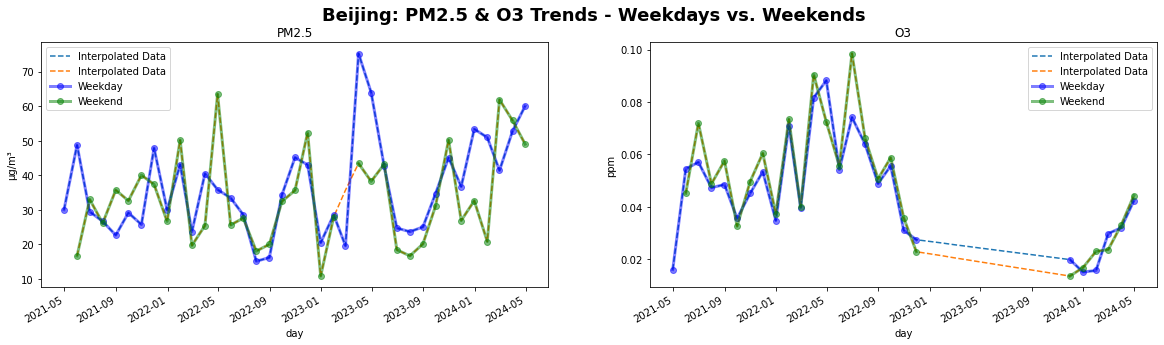

In [129]:
# Visualising the dataset for the city Beijing
import pandas
import matplotlib.pyplot as plt

# Cutting the window in 1 row and 2 columns, and starting a plot in the first part
plt.subplot(121)
# Interpolating the missing values in the PM2.5 column (dotted lines in the graph) 
beijing_weekday_monthly_interpolated = beijing_weekday_monthly.interpolate(method="linear")
beijing_weekend_monthly_interpolated = beijing_weekend_monthly.interpolate(method="linear")
# Plotting the interpolated data
plt.plot(beijing_weekday_monthly_interpolated["PM2.5"], label="Interpolated Data", linestyle="--")
plt.plot(beijing_weekend_monthly_interpolated["PM2.5"], label="Interpolated Data", linestyle="--")
plt.legend()
# Plotting the rest of the original PM2.5 data, both weekday and weekend
beijing_weekday_monthly["PM2.5"].plot(figsize=(20,5), alpha=0.5, color="blue", legend=True, label="Weekday", 
                                      linewidth=3, ylabel="µg/m³", marker="o")
beijing_weekend_monthly["PM2.5"].plot(figsize=(20,5), alpha=0.5, color="green", legend=True, label="Weekend", 
                                      linewidth=3,ylabel="µg/m³", marker="o")
# Setting title for the first subplot
plt.title("PM2.5")
# Now adding the second subplot
plt.subplot(122)
# Interpolating the missing values in the O3 column (dotted lines in the graph) 
beijing_weekday_monthly_interpolated = beijing_weekday_monthly.interpolate(method="linear")
beijing_weekend_monthly_interpolated = beijing_weekend_monthly.interpolate(method="linear")
plt.plot(beijing_weekday_monthly_interpolated["O3"], label="Interpolated Data", linestyle="--")
plt.plot(beijing_weekend_monthly_interpolated["O3"], label="Interpolated Data", linestyle="--")
plt.legend()
# Plotting the rest of the original O3 data, both weekday and weekend
beijing_weekday_monthly["O3"].plot(figsize=(20,5), alpha=0.5, color="blue", legend=True, label="Weekday", 
                                      linewidth=3,ylabel="ppm", marker="o")
beijing_weekend_monthly["O3"].plot(figsize=(20,5), alpha=0.5, color="green", legend=True, label="Weekend", 
                                      linewidth=3,ylabel="ppm", marker="o")
# Setting title for the second subplot
plt.title("O3")
# Setting the main title for the entire plot
plt.suptitle("    Beijing: PM2.5 & O3 Trends - Weekdays vs. Weekends", fontsize = 18, fontweight="bold")

Text(0.5, 0.98, 'Frankfurt: PM2.5 & O3 Trends - Weekdays vs. Weekends')

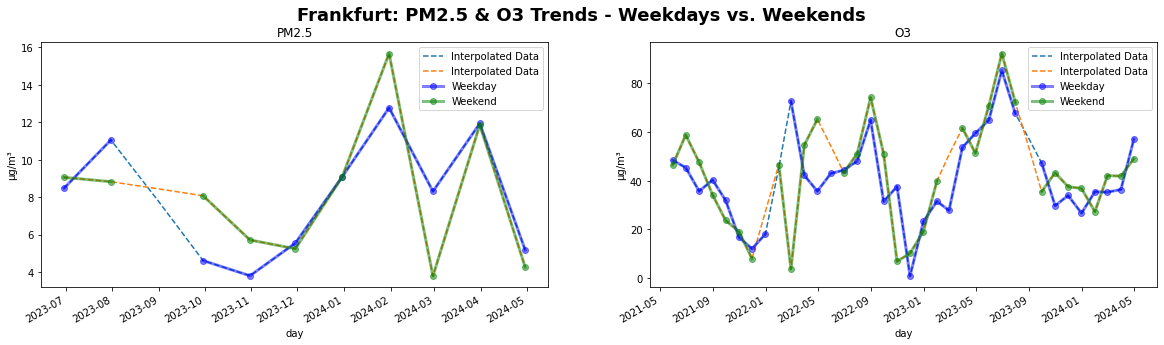

In [135]:
# Visualising the dataset for the city Frankfurt
plt.subplot(121)
frankfurt_weekday_monthly_interpolated = frankfurt_weekday_monthly.interpolate(method="linear")
frankfurt_weekend_monthly_interpolated = frankfurt_weekend_monthly.interpolate(method="linear")
plt.plot(frankfurt_weekday_monthly_interpolated["PM2.5"], label="Interpolated Data", linestyle="--")
plt.plot(frankfurt_weekend_monthly_interpolated["PM2.5"], label="Interpolated Data", linestyle="--")
plt.legend()
frankfurt_weekday_monthly["PM2.5"].plot(figsize=(20,5), alpha=0.5, color="blue", legend=True, label="Weekday", 
                                      linewidth=3, ylabel="µg/m³", marker="o")
frankfurt_weekend_monthly["PM2.5"].plot(figsize=(20,5), alpha=0.5, color="green", legend=True, label="Weekend", 
                                      linewidth=3,ylabel="µg/m³", marker="o")
plt.title("PM2.5")
plt.subplot(122)
frankfurt_weekday_monthly_interpolated = frankfurt_weekday_monthly.interpolate(method="linear")
frankfurt_weekend_monthly_interpolated = frankfurt_weekend_monthly.interpolate(method="linear")
plt.plot(frankfurt_weekday_monthly_interpolated["O3"], label="Interpolated Data", linestyle="--")
plt.plot(frankfurt_weekend_monthly_interpolated["O3"], label="Interpolated Data", linestyle="--")
plt.legend()
frankfurt_weekday_monthly["O3"].plot(figsize=(20,5), alpha=0.5, color="blue", legend=True, label="Weekday", 
                                      linewidth=3,ylabel="µg/m³", marker="o")
frankfurt_weekend_monthly["O3"].plot(figsize=(20,5), alpha=0.5, color="green", legend=True, label="Weekend", 
                                      linewidth=3,ylabel="µg/m³", marker="o")
plt.title("O3")
plt.suptitle("Frankfurt: PM2.5 & O3 Trends - Weekdays vs. Weekends", fontsize = 18, fontweight="bold")

Since the data fetched from the API contains empty fields which are filled by NaN, these values are not charted on the map and hence leave a gap. Inorder to show this on the chart dotted lines are provided. This is achieved by a process called **interpolation**. It has been done before every column is plotted so that the chart looks complete and easily understandable.

Conclusions and inferences can be drawn from this visualisation in order to analyses and answer our research question.

# Conclusion

The following conclusions can be drawn from the above visualisation as it helps to precisely answer the research question of this paper. 

#### Beijing vs Frankfurt

- PM2.5 levels in Beijing and Frankfurt consistently peaks during winter seasons but the magnitude of the peaks is seen higher in Beijing than in Frankfurt. 

Winter season increases artificial heating methods during the colder months along with the temperature inversions which trap the particulate matter closer to the ground which constitutes few of the major reasons for this spike in PM2.5 levels.

- Both cities experience higher O3 levels during the summer, but the levels are generally lower in Frankfurt compared to Beijing. This could be due to different environmental regulations, industrial activity levels, and geographic and climatic conditions.

#### Impact of Weekdays vs Weekends

- The weekend vs weekday patterns are relatively consistent in both the cities for both the pollutants and does not show any stark differences but there can be seen slight differences where weekend emissions are higher during weekends rather than weekdays. This may be due to the variations in traffic emissions, which are a precursor for ozone formation. But in general it can be seen that the primary sources of these pollutants (e.g., traffic, industrial activities, heating) operate similarly across the week.

#### Insights and Interpretations

PM2.5 Levels: Beijing consistently shows higher PM2.5 levels compared to Frankfurt, particularly during the winter. This is likely due to the more significant reliance on coal for heating and industrial activities in Beijing.

O3 Levels: Both cities experience higher O3 levels during the summer, but the levels are generally lower in Frankfurt compared to Beijing. This could be due to different environmental regulations, industrial activity levels, and geographic and climatic conditions.

#### Health and Policy Implications

The peaks in PM2.5 during winter and O3 during summer highlight periods when the public is at higher risk of exposure to these pollutants. It is essential for policymakers to implement and enforce stricter emission controls during these times, and for public health advisories to be more vigilant during these peak periods.